In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a synthetic grocery store transaction dataset
# This simulates real-world shopping basket data
np.random.seed(42)  # For reproducibility

# Define some common grocery items
items = ['bread', 'milk', 'cheese', 'yogurt', 'butter', 'eggs',
         'apple', 'banana', 'orange', 'cereal', 'coffee', 'tea',
         'sugar', 'flour', 'pasta', 'tomato sauce', 'chicken', 'beef',
         'fish', 'rice', 'potato chips', 'chocolate', 'ice cream']

# Generate 1000 random transactions
num_transactions = 1000
transactions = []

# Create some association patterns
# Customers who buy bread often buy milk/butter
# Customers who buy pasta often buy tomato sauce
# Customers who buy cereal often buy milk

In [3]:
for i in range(num_transactions):
    # Base transaction has 1-7 items
    num_items = np.random.randint(1, 8)
    transaction = set(np.random.choice(items, size=num_items, replace=False))

    # Add associations with some probability
    if 'bread' in transaction and np.random.random() < 0.7:
        transaction.add('milk')
        if np.random.random() < 0.5:
            transaction.add('butter')

    if 'pasta' in transaction and np.random.random() < 0.8:
        transaction.add('tomato sauce')

    if 'cereal' in transaction and np.random.random() < 0.65:
        transaction.add('milk')

    transactions.append(list(transaction))

# Print first 5 transactions as example
print("Sample transactions:")

Sample transactions:


In [4]:
for i in range(5):
    print(f"Transaction {i+1}: {transactions[i]}")

# Convert transactions to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
# min_support is the proportion of transactions an itemset must appear in
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Sort by support value for better readability
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)

# Print the frequent itemsets
print("\nFrequent Itemsets (support >= 0.05):")
print(frequent_itemsets.head(10))

# Generate association rules
# Metrics: support, confidence, and lift
# support: frequency of items appearing together
# confidence: conditional probability of Y given X
# lift: ratio of observed support to what would be expected if items were independent

Transaction 1: ['fish', 'tea', 'flour', 'bread', 'milk', 'cereal', 'chicken', 'orange']
Transaction 2: ['rice']
Transaction 3: ['tomato sauce', 'butter', 'cereal', 'chicken', 'orange']
Transaction 4: ['cheese', 'eggs']
Transaction 5: ['flour', 'milk', 'yogurt', 'rice', 'eggs']

Frequent Itemsets (support >= 0.05):
    support        itemsets
14    0.361          (milk)
21    0.295  (tomato sauce)
4     0.235        (butter)
13    0.195     (ice cream)
12    0.194         (flour)
11    0.188          (fish)
15    0.186        (orange)
22    0.185        (yogurt)
0     0.184         (apple)
6     0.184        (cheese)



Association Rules (lift >= 1.0):
             antecedents           consequents  support  confidence      lift
18               (bread)        (milk, butter)    0.076    0.413043  3.442029
15        (milk, butter)               (bread)    0.076    0.633333  3.442029
59               (pasta)  (milk, tomato sauce)    0.057    0.314917  2.738410
54  (milk, tomato sauce)               (pasta)    0.057    0.495652  2.738410
0         (tomato sauce)               (pasta)    0.145    0.491525  2.715610
1                (pasta)        (tomato sauce)    0.145    0.801105  2.715610
58        (tomato sauce)         (milk, pasta)    0.057    0.193220  2.683616
55         (milk, pasta)        (tomato sauce)    0.057    0.791667  2.683616
16       (bread, butter)                (milk)    0.076    0.938272  2.599090
17                (milk)       (bread, butter)    0.076    0.210526  2.599090


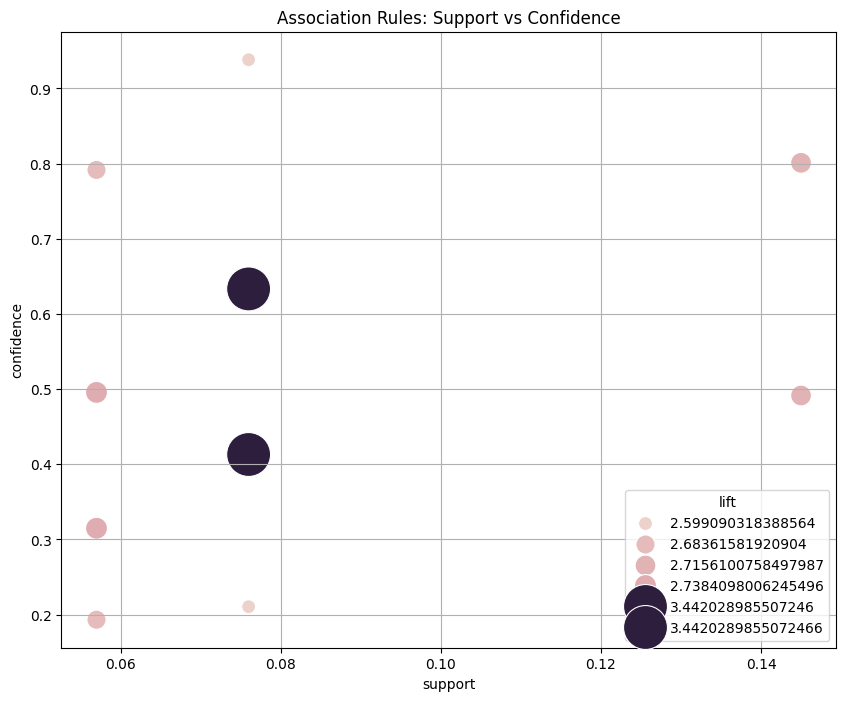

In [5]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by lift for better readability
rules = rules.sort_values('lift', ascending=False)

# Print the association rules
print("\nAssociation Rules (lift >= 1.0):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Visualize top 10 rules by lift
plt.figure(figsize=(10, 8))
sns.scatterplot(x='support', y='confidence', size='lift',
                data=rules.head(10), sizes=(100, 1000), hue='lift')
plt.title('Association Rules: Support vs Confidence')
plt.grid(True)

# Create a bar chart of top 10 items by frequency

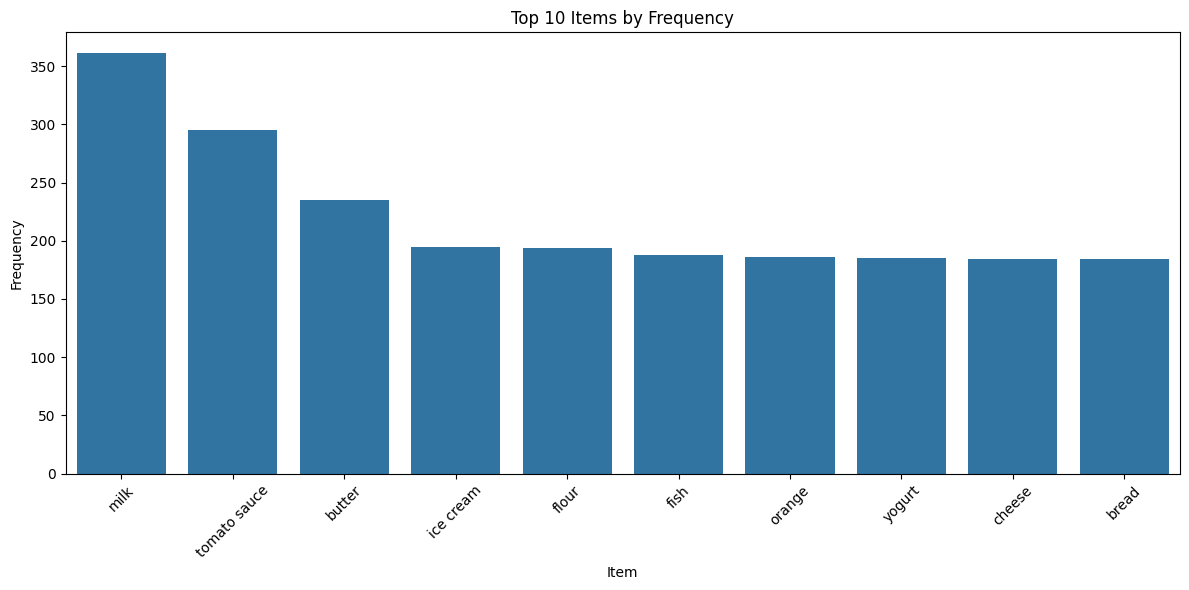

In [6]:
item_frequency = df.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=item_frequency.index, y=item_frequency.values)
plt.title('Top 10 Items by Frequency')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

<ipython-input-8-0ca48146a37c>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.4420289855072466' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.loc[ant, con] = top_rules.iloc[i]['lift']
<ipython-input-8-0ca48146a37c>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.442028985507246' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.loc[ant, con] = top_rules.iloc[i]['lift']
<ipython-input-8-0ca48146a37c>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.7384098006245496' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.loc[ant, con] = top_rules.iloc[i]['lift']
<ipython-input-8-

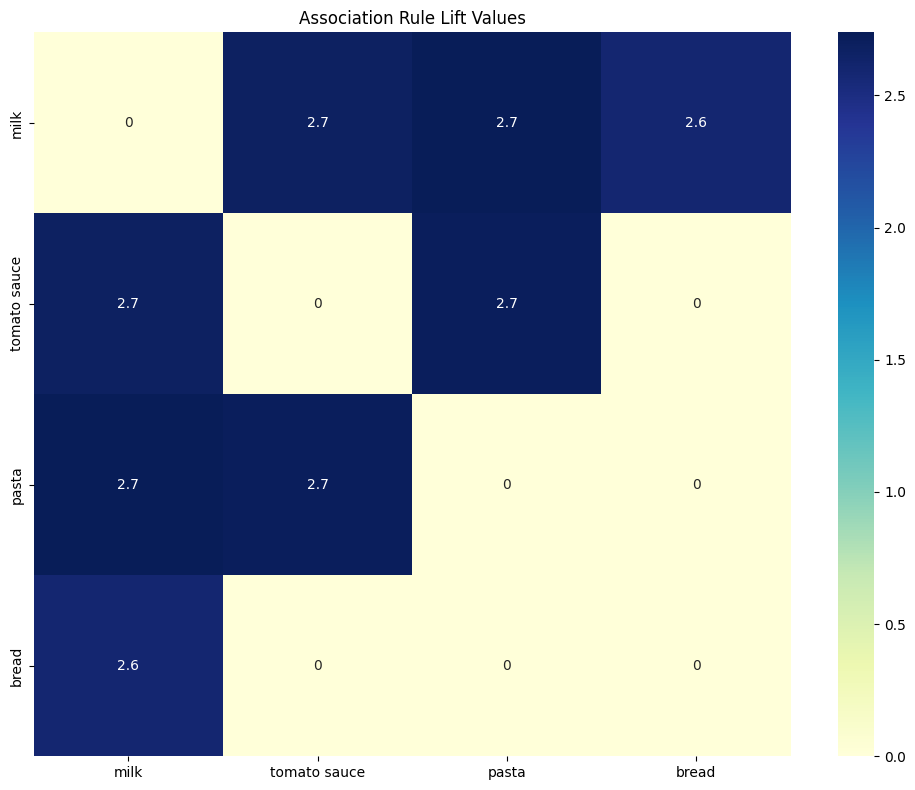

In [8]:
# Display strong associations in a heatmap
# Select top 10 rules by lift
top_rules = rules.head(10)
antecedents = [list(x)[0] for x in top_rules['antecedents']]
consequents = [list(x)[0] for x in top_rules['consequents']]
lifts = top_rules['lift'].values

# Create a DataFrame for the heatmap
# Convert the sets to lists using list()
heatmap_data = pd.DataFrame(0, index=list(set(antecedents)), columns=list(set(consequents)))
for i in range(len(top_rules)):
    ant = list(top_rules.iloc[i]['antecedents'])[0]
    con = list(top_rules.iloc[i]['consequents'])[0]
    heatmap_data.loc[ant, con] = top_rules.iloc[i]['lift']

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Association Rule Lift Values')
plt.tight_layout()

In [9]:
# Function to interpret the rules in plain English
def interpret_rules(rules, top_n=5):
    print("\nTop Association Rules Interpreted:")
    for i in range(min(top_n, len(rules))):
        row = rules.iloc[i]
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        print(f"{i+1}. Customers who buy {antecedents} are {row['lift']:.2f} times more likely to buy {consequents}.")
        print(f"   This pattern appears in {row['support']*100:.2f}% of all transactions.")
        print(f"   When customers buy {antecedents}, they buy {consequents} {row['confidence']*100:.2f}% of the time.\n")

# Interpret the top rules
interpret_rules(rules)

# Show the plots
plt.show()


Top Association Rules Interpreted:
1. Customers who buy bread are 3.44 times more likely to buy milk, butter.
   This pattern appears in 7.60% of all transactions.
   When customers buy bread, they buy milk, butter 41.30% of the time.

2. Customers who buy milk, butter are 3.44 times more likely to buy bread.
   This pattern appears in 7.60% of all transactions.
   When customers buy milk, butter, they buy bread 63.33% of the time.

3. Customers who buy pasta are 2.74 times more likely to buy milk, tomato sauce.
   This pattern appears in 5.70% of all transactions.
   When customers buy pasta, they buy milk, tomato sauce 31.49% of the time.

4. Customers who buy milk, tomato sauce are 2.74 times more likely to buy pasta.
   This pattern appears in 5.70% of all transactions.
   When customers buy milk, tomato sauce, they buy pasta 49.57% of the time.

5. Customers who buy tomato sauce are 2.72 times more likely to buy pasta.
   This pattern appears in 14.50% of all transactions.
   Whe